In [1]:
from tensorflow import keras
import PIL
import PIL.Image as Image
import numpy as np
class_names = ["buildings","glacier  ","forest   ","mountain ","sea      ", "street   "]
model = keras.models.load_model("5Layers_64.keras")
model2 = keras.models.load_model("4Layers_64.keras")
model3 = keras.models.load_model("3Layers_64.keras")

In [2]:
def get_imgs(fnames, label=None):
    data = [np.asarray(Image.open(fname)) for fname in fnames]
    for idx, d in enumerate(data):
        if(d.shape[0] != d.shape[1]):
            data.pop(idx)
    if label == None:
        return np.array(data)
    labels = np.full((len(data),1),label)
    return np.array(data), labels

def predict(img):
    prediction = model.predict(img.reshape((1,150,150,3)), verbose=0)
    prediction2 = model2.predict(img.reshape((1,150,150,3)), verbose=0)
    prediction3 = model3.predict(img.reshape((1,150,150,3)), verbose=0)
    result = "Category \t 3Layer \t 4Layer \t 5Layer\n"
    for i in range(len(prediction[0])):
        result += class_names[i] + "\t {:,.2%}".format(prediction3[0][i])
        result += "\t\t {:,.2%}".format(prediction2[0][i])
        result += "\t\t {:,.2%}".format(prediction[0][i]) + "\n"
    result += "Guess:   \t" + class_names[np.argmax(prediction3[0])] + "\t"
    result += class_names[np.argmax(prediction2[0])] + "\t"
    result += class_names[np.argmax(prediction[0])]
    return result
    # return class_names[np.argmax(prediction,axis=1)[0]] + "{:.0%}".format(np.max(prediction))

def output(image=None):
    if image is None:
        pass
    img = get_imgs([image])[0]
    print(predict(img))
    img = Image.fromarray(img)
    display(img.resize((500,500), resample = Image.Resampling.BICUBIC))

Category 	 3Layer 	 4Layer 	 5Layer
buildings	 41.14%		 1.34%		 99.97%
glacier  	 9.40%		 0.00%		 0.00%
forest   	 45.34%		 98.66%		 0.01%
mountain 	 0.25%		 0.00%		 0.00%
sea      	 0.01%		 0.00%		 0.00%
street   	 3.87%		 0.00%		 0.01%
Guess:   	forest   	forest   	buildings


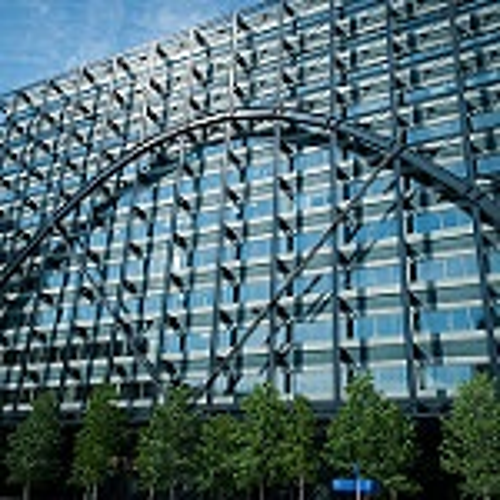

In [8]:
output("images/203.jpg")